In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

We will fit an ARX model of this form to a step response.

$$y(k) = a_1 y(k - 1) + a_2 y(k - 2) + b_1 u(k - 1) + b_2 u(k - 2)$$

In [2]:
data = pandas.read_csv('data.csv', index_col='k')
data['uk'] = 1
data.loc[0] = [0, 1]  # input changes at t=0
data.loc[-1] = [0, 0]  # everything was steady at t < 0
data = data.sort_index()
data

,yk,uk
k,,
-1,0.000,0
0,0.000,1
1,0.058,1
2,0.217,1
3,0.360,1
4,0.488,1
5,0.600,1
6,0.692,1
7,0.772,1


In [3]:
y = data.yk
u = data.uk

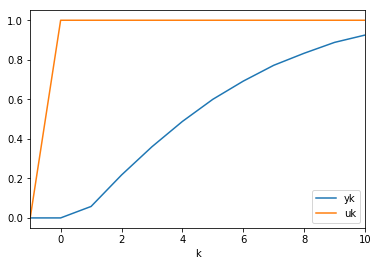

In [4]:
data.plot()

We effectively have the following equations (I repeat the equation here for convenience):

$$y(k) = a_1 y(k - 1) + a_2 y(k - 2) + b_1 u(k - 1) + b_2 u(k - 2)$$

In [5]:
for k in range(1, 11):
    print(f'{y[k]:.2} = a₁×{y[k - 1]:.2} + a₂×{y[k - 2]:.2} + b₁×{u[k - 1]} + b₂×{u[k - 2]}')

0.058 = a₁×0.0 + a₂×0.0 + b₁×1 + b₂×0
0.22 = a₁×0.058 + a₂×0.0 + b₁×1 + b₂×1
0.36 = a₁×0.22 + a₂×0.058 + b₁×1 + b₂×1
0.49 = a₁×0.36 + a₂×0.22 + b₁×1 + b₂×1
0.6 = a₁×0.49 + a₂×0.36 + b₁×1 + b₂×1
0.69 = a₁×0.6 + a₂×0.49 + b₁×1 + b₂×1
0.77 = a₁×0.69 + a₂×0.6 + b₁×1 + b₂×1
0.83 = a₁×0.77 + a₂×0.69 + b₁×1 + b₂×1
0.89 = a₁×0.83 + a₂×0.77 + b₁×1 + b₂×1
0.93 = a₁×0.89 + a₂×0.83 + b₁×1 + b₂×1


We notice that these equations are linear in the coefficients. We can define $\beta= [a_1, a_2, b_1, b_2]^T$. Now, to write the above equations in matrix form $Y = X \beta $, we define

In [6]:
Y = numpy.atleast_2d(y.loc[1:]).T
Y

array([[ 0.058],
       [ 0.217],
       [ 0.36 ],
       [ 0.488],
       [ 0.6  ],
       [ 0.692],
       [ 0.772],
       [ 0.833],
       [ 0.888],
       [ 0.925]])

To build the coefficient matrix we observe that there are two blocks of constant diagonals (the part with the $y$s and the part with the $u$s). Matrices with constant diagonals are called Toeplitz matrices and can be constructed with the `scipy.linalg.toeplitz` function.

In [7]:
import scipy
import scipy.linalg

In [8]:
X1 = scipy.linalg.toeplitz(y.loc[0:9], [0, 0])
X1

array([[ 0.   ,  0.   ],
       [ 0.058,  0.   ],
       [ 0.217,  0.058],
       [ 0.36 ,  0.217],
       [ 0.488,  0.36 ],
       [ 0.6  ,  0.488],
       [ 0.692,  0.6  ],
       [ 0.772,  0.692],
       [ 0.833,  0.772],
       [ 0.888,  0.833]])

In [9]:
X2 = scipy.linalg.toeplitz(u.loc[0:9], [0, 0])
X2

array([[1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [10]:
X = numpy.hstack([X1, X2])

In [11]:
X

array([[ 0.   ,  0.   ,  1.   ,  0.   ],
       [ 0.058,  0.   ,  1.   ,  1.   ],
       [ 0.217,  0.058,  1.   ,  1.   ],
       [ 0.36 ,  0.217,  1.   ,  1.   ],
       [ 0.488,  0.36 ,  1.   ,  1.   ],
       [ 0.6  ,  0.488,  1.   ,  1.   ],
       [ 0.692,  0.6  ,  1.   ,  1.   ],
       [ 0.772,  0.692,  1.   ,  1.   ],
       [ 0.833,  0.772,  1.   ,  1.   ],
       [ 0.888,  0.833,  1.   ,  1.   ]])

Another option is to use the loop from before to construct the matrices. This is a little more legible but slower:

In [12]:
Y = []
X = []
for k in range(1, 11):
    Y.append([y[k]])
    X.append([y[k - 1], y[k - 2], u[k - 1], u[k - 2]])
Y = numpy.array(Y)
X = numpy.array(X)

We solve for $\beta$ as we did for linear regression:

In [13]:
beta, _, _, _ = numpy.linalg.lstsq(X, Y)
beta

array([[ 0.98464753],
       [-0.12211256],
       [ 0.058     ],
       [ 0.10124916]])